In [60]:
from scipy.optimize import fsolve, least_squares
import numpy as np
import random
import matplotlib.pyplot as plt

In [61]:
from scipy.optimize import fsolve, least_squares
import numpy as np

def tdoa_trilateration_fs(mic_locations, time_diffs):
    # mic_locations: list of tuples containing microphone locations
    # time_diffs: list of tuples containing pairs of microphone indices and corresponding time differences
    
    c = 343.0 # speed of sound in air (m/s)
    
    def equations(p):
        x, y = p
        eqns = []
        for mic_pair, time_diff in time_diffs:
            i, j = mic_pair
            eqn = (np.sqrt((x - mic_locations[i][0])**2 + (y - mic_locations[i][1])**2) - np.sqrt((x - mic_locations[j][0])**2 + (y - mic_locations[j][1])**2)) - c * time_diff
            eqns.append(eqn)
        return eqns
    
    x, y = fsolve(equations, (0, 0))
    
    return x, y

def tdoa_trilateration_ls(mic_locations, time_diffs):
    # mic_locations: list of tuples containing microphone locations
    # time_diffs: list of tuples containing pairs of microphone indices and corresponding time differences
    
    c = 343.0 # speed of sound in air (m/s)
    
    def equations(p):
        x, y = p
        eqns = []
        for mic_pair, time_diff in time_diffs:
            i, j = mic_pair
            eqn = (np.sqrt((x - mic_locations[i][0])**2 + (y - mic_locations[i][1])**2) - np.sqrt((x - mic_locations[j][0])**2 + (y - mic_locations[j][1])**2)) - c * time_diff
            eqns.append(eqn)
        return eqns
    
    res = least_squares(equations, (0, 0))
    x, y = res.x
    
    return x, y

def tdoa_trilateration(mic_locations, time_diffs):
    if len(mic_locations) == 3:
        return tdoa_trilateration_fs(mic_locations, time_diffs)
    else:
        return tdoa_trilateration_ls(mic_locations, time_diffs)


In [ ]:
def hyperbola_params(mic1, mic2, time_diff, c=343.0):
    # Calculate distance difference
    d = c * time_diff
    
    # Calculate distance between microphones
    a = np.sqrt((mic2[0] - mic1[0])**2 + (mic2[1] - mic1[1])**2) / 2
    
    # Calculate distance from center to foci
    c = np.sqrt(a**2 + (d/2)**2)
    
    # Calculate distance from center to vertices
    b = np.sqrt(c**2 - a**2)
    
    # Calculate angle of rotation
    angle = np.arctan2(mic2[1] - mic1[1], mic2[0] - mic1[0])
    
    # Calculate center point
    center = ((mic1[0] + mic2[0]) / 2, (mic1[1] + mic2[1]) / 2)
    
    return center, a, b, angle


In [62]:
def generate_random_tdoa_data(xmin, xmax, c=343.0, n=3):
    # Generate random sound location
    sound_loc = (random.uniform(xmin, xmax), random.uniform(xmin, xmax))
    
    # Generate random microphone locations
    mic_locations = [(random.uniform(xmin, xmax), random.uniform(xmin, xmax))]
    
    # Calculate time differences between pairs of microphones
    time_diffs = []
    for i in range(1, n):
        # Add a new microphone
        mic_locations.append((random.uniform(xmin, xmax), random.uniform(xmin, xmax)))

        # Select one of the previous microphones as a parther for the new microphone
        j = random.randint(0, i-1)

        d1 = np.sqrt((sound_loc[0] - mic_locations[i][0])**2 + (sound_loc[1] - mic_locations[i][1])**2)
        d2 = np.sqrt((sound_loc[0] - mic_locations[j][0])**2 + (sound_loc[1] - mic_locations[j][1])**2)
        time_diff = (d1 - d2) / c
        time_diffs.append(((i, j), time_diff))
    
    return sound_loc, mic_locations, time_diffs


Sound Location: (9.889694096677491, 6.477808541959593)
Microphone Locations: [(9.04238103703158, 9.354782631868309), (7.684886552310681, 7.6982004041758065), (1.7576338121079305, 3.6407263995313253), (0.8911263334242769, 6.995176440063597)]
Time Differences: [((1, 0), -0.001396871115391163), ((2, 1), 0.017763038932741265), ((3, 2), 0.0011681624639506892)]


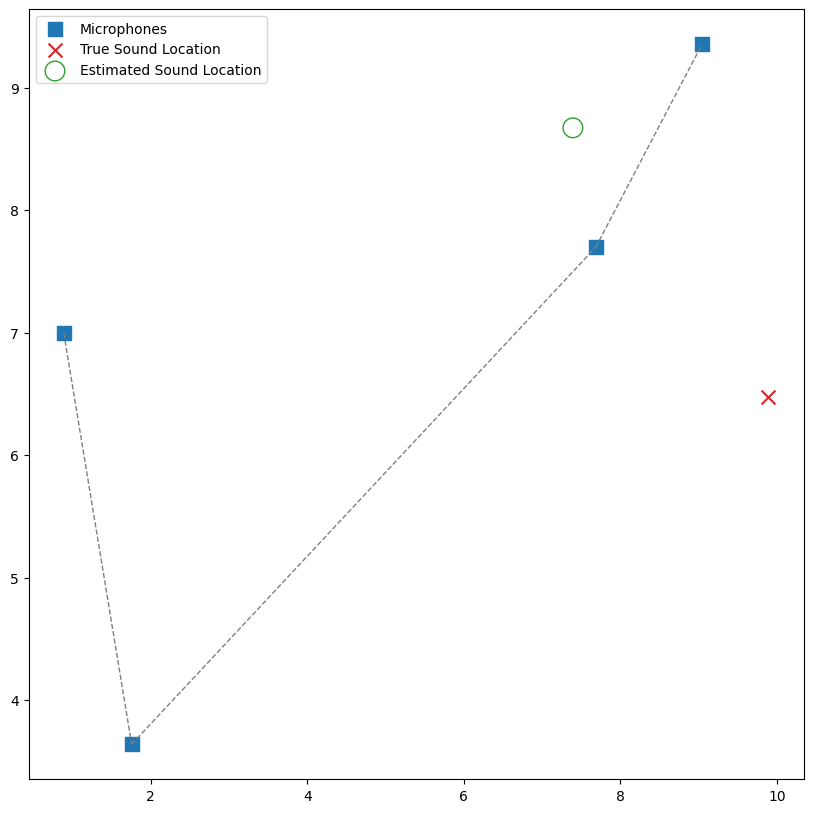

In [70]:
sound_loc, mic_locations, time_diffs = generate_random_tdoa_data(0, 10, n=4)
print('Sound Location: {}'.format(sound_loc))
print('Microphone Locations: {}'.format(mic_locations))
print('Time Differences: {}'.format(time_diffs))

# Estimate sound location
est_loc = tdoa_trilateration(mic_locations, time_diffs)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot sound location, microphone locations, and estimated sound source location
plt.scatter(*zip(*mic_locations), color='tab:blue', label='Microphones', s=100, marker='s')
plt.scatter(*sound_loc, color='tab:red', label='True Sound Location', s=100, marker='x')
plt.scatter(*est_loc, color='tab:green', label='Estimated Sound Location', facecolors='none', s=200, marker='o')

# Plot faint lines between microphone pairs
for mic_pair, time_diff in time_diffs:
    i, j = mic_pair
    x1, y1 = mic_locations[i]
    x2, y2 = mic_locations[j]
    plt.plot([x1, x2], [y1, y2], color='gray', linestyle='dashed', linewidth=1)

plt.legend()
plt.show()